<a href="https://colab.research.google.com/github/VeraKutyavina/ml-tasks/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [102]:
def random_points(n):
  points = []
  points = make_blobs(n)
  return points[0]
  
def dist(pntA, pntB):
  return np.sqrt((pntA[0] - pntB[0])**2 + (pntA[1] - pntB[1])**2)

def calculate_mean(points):
  x_mean = 0
  y_mean = 0
  count = 0

  for i in range(len(points)):
    x_mean += points[i][0]
    y_mean += points[i][1]
    count += 1

  x_mean /= count
  y_mean /= count

  return [x_mean, y_mean]

def init_center(points, k): 
  pnt_mean = calculate_mean(points)
  R = -1

  for i in range(len(points)):
    current_dist = dist(points[i], pnt_mean);
    if R < current_dist:
      R = current_dist
  centroids = []
  for i in range(k):
    x_c = R*np.cos(2*np.pi*i/k) + pnt_mean[0]    
    y_c = R*np.sin(2*np.pi*i/k) + pnt_mean[1] 
    centroids.append([x_c, y_c])

  return np.array(centroids)  


def calculate_nearest_centroid(points, centroids):
  clusters = {} 

  for i in range(len(centroids)):
    clusters[i] = []

  for i in range(len(points)):
    points_range = []

    for j in range(len(centroids)):
      points_range.append(dist(points[i], centroids[j]))

    index = points_range.index(min(points_range))
    clusters[index].append(points[i])

  return clusters


def centroids_update(centroids, clusters):
    k = len(centroids)
    for i in range(k):
      centroids[i] = calculate_mean(clusters[i])
    return centroids


def draw(clusters):
  # colors = ['hotpink', '#CBF5A0', '#FFF46B', '#FFF46B']
  for i in range(len(clusters)):
    x_coordinates = []
    y_coordinates = []
    for j in range(len(clusters[i])):
      x_coordinates.append(clusters[i][j][0])
      y_coordinates.append(clusters[i][j][1])
    plt.scatter(x_coordinates, y_coordinates)
  plt.show()

def is_equals(centroids, privious_centroids):
  return (centroids == privious_centroids).all()   


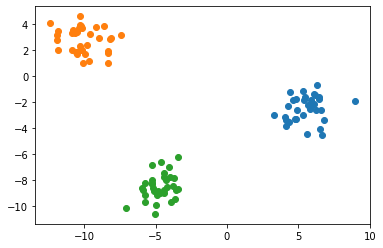

In [101]:
if __name__ == '__main__':
  n = 100;
  k = 3

  points = random_points(n)
  centroids = init_center(points, k)
  clusters = calculate_nearest_centroid(points, centroids)

  privious_centroids = copy.deepcopy(centroids)

  while not is_equals(centroids, privious_centroids):
    centroids = centroids_update(centroids, clusters)
    clusters = calculate_nearest_centroid(points, centroids)

    privious_centroids = copy.deepcopy(centroids) 
  
  draw(clusters)
